In [19]:
import pandas as pd
from pandas import Series, DataFrame
csv_file="p2p.csv"
data=pd.read_csv(csv_file)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math
#分割資料train/test
X=data.drop('loan_status',axis=1)
y=data['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#輸出train
df_train=pd.concat([X_train,y_train],axis=1)
df_train.to_csv("p2ptrain.csv",index=True,header=True,sep=',')

#輸出test
df_test=pd.concat([X_test,y_test],axis=1)
df_test.to_csv("p2ptest.csv",index=True,header=True,sep=',')


In [ ]:
from sklearn import linear_model
lassoreg = linear_model.Lasso(alpha=0.1)
lassoreg.fit(X_train, y_train)
#print(lassoreg.coef_)
#lassoregression係數=0不選去除


In [21]:
import pandas as pd
from pandas import Series, DataFrame
#輸入篩好的test/train
csv_file="p2ptest_28 variable.csv"
csv_file2="p2ptrain_28 variable.csv"
datatest=pd.read_csv(csv_file)
datatrain=pd.read_csv(csv_file2)
X_test=datatest.drop('loan_status',axis=1)
y_test=datatest['loan_status']
X_train=datatrain.drop('loan_status',axis=1)
y_train=datatrain['loan_status']

In [22]:
X_test

,loan_amnt,funded_amnt,annual_inc,fico_range_low,fico_range_high,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,...,max_bal_bc,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,delinq_amnt,mo_sin_old_il_acct,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,25000,25000,160000.00,740,744,12514.0,0.00,26467.20000,25000.00,1467.20,...,0,49200,8197,32086,0,133.0,276065,245922,44600,226865
1,25000,25000,182099.29,680,684,29567.0,0.00,32929.59000,25000.00,7929.59,...,0,43100,111165,11534,0,130.0,1294367,46693,34800,19267
2,15000,15000,65000.00,675,679,14974.0,0.00,16978.17436,15000.00,1978.17,...,5229,31800,1629,7678,0,50.0,49875,22812,18800,18075
3,38350,38350,85000.00,710,714,19715.0,27683.70,22508.89000,10666.30,11842.59,...,12602,24800,28272,198,0,187.0,320181,97648,12800,137974
4,10000,10000,85000.00,700,704,82858.0,0.00,12279.84353,10000.00,2279.84,...,0,139950,12624,7317,0,20.0,315905,48998,43900,28955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314568,12000,12000,48000.00,700,704,13177.0,0.00,6715.46000,4528.81,1389.30,...,4607,21300,13641,6623,0,76.0,203973,86066,19800,74666
314569,40000,40000,135000.00,725,729,50105.0,0.00,12468.02000,7468.43,4699.59,...,12229,82900,11900,14944,0,141.0,249924,77419,45500,62024
314570,35000,35000,110000.00,710,714,50358.0,0.00,39318.15497,35000.00,4318.15,...,13326,77400,21283,14111,0,136.0,407563,80439,63500,44163
314571,12000,12000,35000.00,665,669,10157.0,2838.45,11874.58000,9161.55,2713.03,...,2232,23500,677,957,0,91.0,23500,10157,8500,0


In [23]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
314568    1
314569    1
314570    0
314571    0
314572    0
Name: loan_status, Length: 314573, dtype: int64

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [25]:
full = X_train.T.append(y_train.T).T

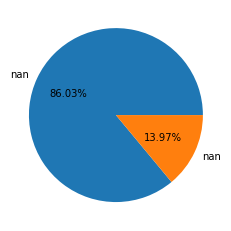

In [26]:
plt.axes(aspect = 'equal')
counts = full.loan_status.value_counts()
plt.pie(x = counts,
        labels=pd.Series(counts.index).map({'0':'未違約','1':'違約'}),
        autopct='%.2f%%'
       )

plt.show()

In [27]:
predictors = full.columns[:-1]

X_train,X_test,y_train,y_test = model_selection.train_test_split(full[predictors], full.loan_status, random_state=12)

In [28]:
from imblearn.over_sampling import BorderlineSMOTE
over_samples = SMOTE(random_state=1234) 
#over_samples_X,over_samples_y = BorderlineSMOTE(random_state=42, kind='borderline-1').fit_resample(X_train, y_train)
over_samples_X,over_samples_y = over_samples.fit_resample(X_train, y_train)

In [30]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(over_samples_X, over_samples_y)
y_pred = logisticRegr.predict(X_test)


print("Macro-average: {0}".format(metrics.f1_score(y_test, y_pred,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(y_test, y_pred,average='micro')))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


print("Average = macro")
print('precision:',metrics.precision_score(y_test, y_pred,average='macro')) 
print('recall:',metrics.recall_score(y_test, y_pred,average='macro'))
print('F1-score:',metrics.f1_score(y_test, y_pred,average='macro'))


print("Average = micro")
print('precision:',metrics.precision_score(y_test, y_pred,average='micro')) 
print('recall:',metrics.recall_score(y_test, y_pred,average='micro'))
print('F1-score:',metrics.f1_score(y_test, y_pred,average='micro'))


print("Average = weighted")
print('precision:',metrics.precision_score(y_test, y_pred,average='weighted')) 
print('recall:',metrics.recall_score(y_test, y_pred,average='weighted'))
print('F1-score:',metrics.f1_score(y_test, y_pred,average='weighted'))


print("Average = binary")
print('precision:',metrics.precision_score(y_test, y_pred,average='binary')) 
print('recall:',metrics.recall_score(y_test, y_pred,average='binary'))
print('F1-score:',metrics.f1_score(y_test, y_pred,average='binary'))



C:\Users\a0975\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Macro-average: 0.9740783316940836
Micro-average: 0.9878747254783352
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    157832
         1.0       0.99      0.92      0.96     25669

    accuracy                           0.99    183501
   macro avg       0.99      0.96      0.97    183501
weighted avg       0.99      0.99      0.99    183501

[[157574    258]
 [  1967  23702]]
Accuracy: 98.79%
Average = macro
precision: 0.9884514671308893
recall: 0.9608679765858746
F1-score: 0.9740783316940836
Average = micro
precision: 0.9878747254783352
recall: 0.9878747254783352
F1-score: 0.9878747254783352
Average = weighted
precision: 0.9878892651481151
recall: 0.9878747254783352
F1-score: 0.9876986017409048
Average = binary
precision: 0.9892320534223706
recall: 0.9233706026724843
F1-score: 0.9551673416752301


In [12]:
X_test

,loan_amnt,funded_amnt,annual_inc,fico_range_low,fico_range_high,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,...,max_bal_bc,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,delinq_amnt,mo_sin_old_il_acct,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,25000,25000,160000.00,740,744,12514.0,0.00,26467.20000,25000.00,1467.20,...,0,49200,8197,32086,0,133.0,276065,245922,44600,226865
1,25000,25000,182099.29,680,684,29567.0,0.00,32929.59000,25000.00,7929.59,...,0,43100,111165,11534,0,130.0,1294367,46693,34800,19267
2,15000,15000,65000.00,675,679,14974.0,0.00,16978.17436,15000.00,1978.17,...,5229,31800,1629,7678,0,50.0,49875,22812,18800,18075
3,38350,38350,85000.00,710,714,19715.0,27683.70,22508.89000,10666.30,11842.59,...,12602,24800,28272,198,0,187.0,320181,97648,12800,137974
4,10000,10000,85000.00,700,704,82858.0,0.00,12279.84353,10000.00,2279.84,...,0,139950,12624,7317,0,20.0,315905,48998,43900,28955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314568,12000,12000,48000.00,700,704,13177.0,0.00,6715.46000,4528.81,1389.30,...,4607,21300,13641,6623,0,76.0,203973,86066,19800,74666
314569,40000,40000,135000.00,725,729,50105.0,0.00,12468.02000,7468.43,4699.59,...,12229,82900,11900,14944,0,141.0,249924,77419,45500,62024
314570,35000,35000,110000.00,710,714,50358.0,0.00,39318.15497,35000.00,4318.15,...,13326,77400,21283,14111,0,136.0,407563,80439,63500,44163
314571,12000,12000,35000.00,665,669,10157.0,2838.45,11874.58000,9161.55,2713.03,...,2232,23500,677,957,0,91.0,23500,10157,8500,0


In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
csv_file2="p2ptest.csv"
datatest=pd.read_csv(csv_file)

In [9]:
x_test = pd.read_csv('p2ptest.csv')
y_test=datatest['loan_status']

In [18]:
x_test

,Unnamed: 0,loan_amnt,funded_amnt,term,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
0,875680,25000,25000,36,760.89,1,1.1,1.0,1,160000.00,...,0.0,0,0,276065,245922,44600,226865,0,0,0
1,1046906,25000,25000,60,549.07,2,2.4,4.0,0,182099.29,...,60.0,0,0,1294367,46693,34800,19267,0,0,0
2,646861,15000,15000,36,493.86,2,2.3,10.0,0,65000.00,...,20.0,0,0,49875,22812,18800,18075,0,0,0
3,704385,38350,38350,60,993.56,4,4.2,10.0,0,85000.00,...,100.0,0,0,320181,97648,12800,137974,0,0,0
4,798051,10000,10000,36,341.73,3,3.4,10.0,0,85000.00,...,33.3,0,0,315905,48998,43900,28955,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314568,440203,12000,12000,36,392.36,2,2.4,2.0,0,48000.00,...,33.3,0,0,203973,86066,19800,74666,0,1,1
314569,520337,40000,40000,60,870.90,2,2.3,10.0,0,135000.00,...,40.0,0,0,249924,77419,45500,62024,0,1,1
314570,798991,35000,35000,36,1095.00,1,1.5,10.0,0,110000.00,...,55.6,0,0,407563,80439,63500,44163,0,0,0
314571,942822,12000,12000,36,407.75,3,3.2,3.0,1,35000.00,...,80.0,1,0,23500,10157,8500,0,0,0,0


In [19]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
314568    1
314569    1
314570    0
314571    0
314572    0
Name: loan_status, Length: 314573, dtype: int64

In [22]:
pred = logisticRegr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print("Macro-average: {0}".format(metrics.f1_score(y_test, y_pred,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(y_test, y_pred,average='micro')))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("\n")
print("Average = macro")
print('precision:',metrics.precision_score(y_test, y_pred,average='macro')) 
print('recall:',metrics.recall_score(y_test, y_pred,average='macro'))
print('F1-score:',metrics.f1_score(y_test, y_pred,average='macro'))

print("\n")
print("Average = micro")
print('precision:',metrics.precision_score(y_test, y_pred,average='micro')) 
print('recall:',metrics.recall_score(y_test, y_pred,average='micro'))
print('F1-score:',metrics.f1_score(y_test, y_pred,average='micro'))

print("\n")
print("Average = weighted")
print('precision:',metrics.precision_score(y_test, y_pred,average='weighted')) 
print('recall:',metrics.recall_score(y_test, y_pred,average='weighted'))
print('F1-score:',metrics.f1_score(y_test, y_pred,average='weighted'))


Macro-average: 0.9740425350629429
Micro-average: 0.9878343023717865
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    270163
           1       1.00      0.92      0.96     44410

    accuracy                           0.99    314573
   macro avg       0.99      0.96      0.97    314573
weighted avg       0.99      0.99      0.99    314573

[[270022    141]
 [  3686  40724]]
Accuracy: 98.78%


Average = macro
precision: 0.9915413541232332
recall: 0.9582393841892924
F1-score: 0.9740425350629429


Average = micro
precision: 0.9878343023717865
recall: 0.9878343023717865
F1-score: 0.9878343023717865


Average = weighted
precision: 0.9879471809935092
recall: 0.9878343023717865
F1-score: 0.987621078466171
